In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
plt.style.use('seaborn')

In [4]:
mean_01 = np.array([1, 0.5])
cov_01 = np.array([[1, 0.1],[0.1, 1.2]])

mean_02 = np.array([4, 5])
cov_02 = np.array([[1.21, 0.1],[0.1, 1.3]])

# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500) 
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)
#print(dist_01[:5,:]) #print(dist_02[:5,:])
print(dist_02.shape)



(500, 2)


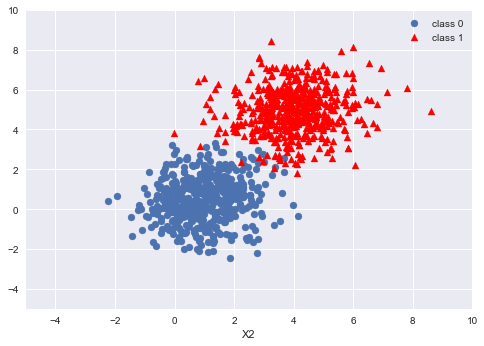

In [5]:
# Data Visualize
plt.scatter(dist_01[:,0],dist_01[:,1], label='class 0')
plt.scatter(dist_02[:,0],dist_02[:,1], label='class 1',color='r',marker='^')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('X1')
plt.xlabel('X2')
plt.legend()
plt.show()

In [5]:
# Create training and testing set
data = np.zeros((1000,3))
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0

print(data)

np.random.shuffle(data)

split = int(.8*data.shape[0])
print("Split: ",split)
######################################
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test = data[split:,-1]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

[[-0.99770331  0.53275858  0.        ]
 [-0.46897716  0.16476627  0.        ]
 [ 1.35738123  0.50099587  0.        ]
 ...
 [ 3.88422676  5.41373741  1.        ]
 [ 6.45397653  6.92130201  1.        ]
 [ 3.6202281   6.3728095   1.        ]]
Split:  800
(800, 2) (800,)
(200, 2) (200,)


In [6]:
def hypothesis(x,w,b):
    h = np.dot(x,w) + b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

def error(y_true,x,w,b):
    m = x.shape[0]
    
    err = 0.0
    
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        err += y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)
    
    return -err/m

def get_grads(y_true,x,w,b):
    
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        
        grad_w += (y_true[i] - hx)*x[i]
        grad_b += (y_true[i] - hx)
        
    grad_b /= m
    grad_w /= m
    
    return [grad_w, grad_b]


def gradient_descent(x,y_true,w,b,learning_rate=0.1):
    
    err = error(y_true,x,w,b)
    [grad_w, grad_b] = get_grads(y_true,x,w,b)
    
    w = w + learning_rate * grad_w
    b = b + learning_rate * grad_b
    
    return err,w,b

def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence < 0.5:
        return 0
    else:
        return 1
    
def get_acc(x_tst, y_tst,w,b):
    y_pred = []
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return float((y_pred == y_tst).sum())/y_tst.shape[0]
        


    

In [7]:
loss = []
acc = []

W = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()

print(W,b)

[0.98633063 0.87218426] 2.226222967205844


In [8]:
for i in range(100):
    l,W,b = gradient_descent(X_train,Y_train,W,b,learning_rate=0.5)
    acc.append(get_acc(X_test,Y_test,W,b))
    loss.append(l)
print(loss)

[2.5394062540559275, 2.191435783344535, 1.8557253098702988, 1.5419437975964845, 1.2718540208216624, 1.088780878172786, 1.0004093919225467, 0.9343566621885774, 0.8760268942395437, 0.8242764207289788, 0.7781324320808319, 0.7367710414449202, 0.6995042484059898, 0.6657622266938239, 0.6350734939381235, 0.6070467214638613, 0.5813553107713948, 0.5577248459894946, 0.5359230880902567, 0.5157520651269533, 0.4970418318248085, 0.479645535811541, 0.4634354987256245, 0.4483000840710355, 0.4341411760083426, 0.420872134482544, 0.40841612381701353, 0.3967047360421775, 0.38567684849205464, 0.37527766900057663, 0.36545793246714053, 0.35617322047956734, 0.34738338171643185, 0.3390520354723035, 0.3311461442101819, 0.3236356438064065, 0.3164931223082991, 0.30969353971847274, 0.3032139826599872, 0.29703344884441746, 0.29113265712171554, 0.2854938795826397, 0.2801007927470047, 0.2749383453311, 0.26999264046619087, 0.2652508305533785, 0.26070102320081406, 0.256332196907341, 0.25213412533996094, 0.2480973092072

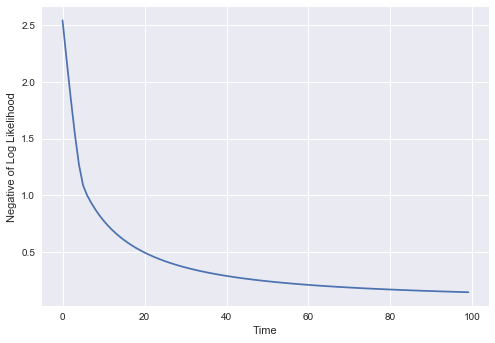

In [9]:
plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

[0.425, 0.425, 0.425, 0.42, 0.42, 0.425, 0.435, 0.46, 0.505, 0.54, 0.565, 0.595, 0.63, 0.665, 0.695, 0.715, 0.74, 0.74, 0.765, 0.78, 0.78, 0.8, 0.81, 0.82, 0.83, 0.845, 0.85, 0.855, 0.855, 0.86, 0.87, 0.875, 0.875, 0.875, 0.885, 0.885, 0.89, 0.89, 0.895, 0.905, 0.905, 0.91, 0.915, 0.915, 0.915, 0.915, 0.915, 0.915, 0.915, 0.93, 0.93, 0.93, 0.935, 0.935, 0.935, 0.935, 0.935, 0.935, 0.935, 0.935, 0.945, 0.945, 0.945, 0.945, 0.945, 0.945, 0.945, 0.945, 0.945, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.955, 0.96, 0.965, 0.965, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97]


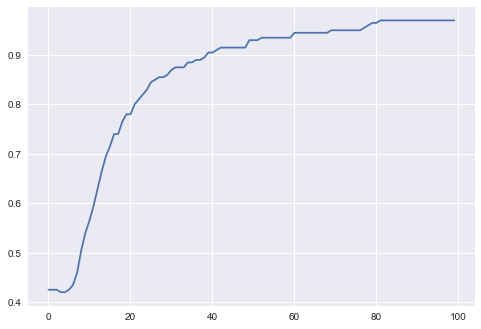

0.97


In [10]:
print(acc)
plt.plot(acc)
plt.show()
print(acc[-1])

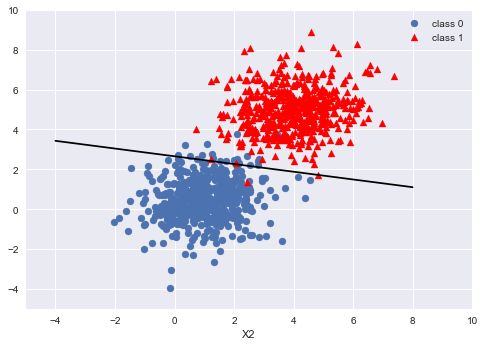

In [11]:
# Data Visualize
plt.scatter(dist_01[:,0],dist_01[:,1], label='class 0')
plt.scatter(dist_02[:,0],dist_02[:,1], label='class 1',color='r',marker='^')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('X1')
plt.xlabel('X2')
x = np.linspace(-4,8,10)
y = -(W[0]*x + b)/W[1]
plt.plot(x,y,color='k')
plt.legend()
plt.show()